In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d heesoo37/120-years-of-olympic-history-athletes-and-results

120-years-of-olympic-history-athletes-and-results.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/120-years-of-olympic-history-athletes-and-results.zip","r")
zip_ref.extractall("/content")
zip_ref.close()

In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/athlete_events.csv")

In [6]:
noc_df = pd.read_csv("/content/noc_regions.csv")

Data Wrangling

In [7]:
import random
random.seed(4)

In [8]:
df = df.merge(noc_df,on="NOC",how="left")

In [9]:
df.tail()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN


In [10]:
df.shape

(271116, 17)

In [11]:
selected_col = ["Sex" , "Age" , "Height" , "Weight" , "region" ,"Sport","Medal"]

In [12]:
df_temp = df[selected_col]

In [13]:
df_temp

,Sex,Age,Height,Weight,region,Sport,Medal
0,M,24.0,180.0,80.0,China,Basketball,NaN
1,M,23.0,170.0,60.0,China,Judo,NaN
2,M,24.0,NaN,NaN,Denmark,Football,NaN
3,M,34.0,NaN,NaN,Denmark,Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,Speed Skating,NaN
...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Poland,Luge,NaN
271112,M,27.0,176.0,59.0,Poland,Ski Jumping,NaN
271113,M,27.0,176.0,59.0,Poland,Ski Jumping,NaN
271114,M,30.0,185.0,96.0,Poland,Bobsleigh,NaN


In [14]:
df_temp["ID"] = np.arange(0,271116)

<ipython-input-14-6a32e352b6be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["ID"] = np.arange(0,271116)


In [15]:
df_temp

,Sex,Age,Height,Weight,region,Sport,Medal,ID
0,M,24.0,180.0,80.0,China,Basketball,NaN,0
1,M,23.0,170.0,60.0,China,Judo,NaN,1
2,M,24.0,NaN,NaN,Denmark,Football,NaN,2
3,M,34.0,NaN,NaN,Denmark,Tug-Of-War,Gold,3
4,F,21.0,185.0,82.0,Netherlands,Speed Skating,NaN,4
...,...,...,...,...,...,...,...,...
271111,M,29.0,179.0,89.0,Poland,Luge,NaN,271111
271112,M,27.0,176.0,59.0,Poland,Ski Jumping,NaN,271112
271113,M,27.0,176.0,59.0,Poland,Ski Jumping,NaN,271113
271114,M,30.0,185.0,96.0,Poland,Bobsleigh,NaN,271114


In [16]:
dict ={
    np.nan:0,
    "Gold":1,
    "Silver":1,
    "Bronze":1
}

In [17]:
df_temp["Medal"] = df_temp["Medal"].replace(dict)

<ipython-input-17-3fed600d219d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["Medal"] = df_temp["Medal"].replace(dict)


In [18]:
df_temp.head()

,Sex,Age,Height,Weight,region,Sport,Medal,ID
0,M,24.0,180.0,80.0,China,Basketball,0,0
1,M,23.0,170.0,60.0,China,Judo,0,1
2,M,24.0,NaN,NaN,Denmark,Football,0,2
3,M,34.0,NaN,NaN,Denmark,Tug-Of-War,1,3
4,F,21.0,185.0,82.0,Netherlands,Speed Skating,0,4


In [19]:
medal = df_temp[df_temp["Medal"] == 1].shape[0]
no_medal = df_temp[df_temp["Medal"] == 0].shape[0]

In [20]:
medal , no_medal , medal+no_medal, df_temp.shape[0]

(39783, 231333, 271116, 271116)

In [21]:
medal_df = df_temp[df_temp["Medal"] == 1]
no_medal_df = df_temp[df_temp["Medal"] == 0].head(39783)

In [22]:
df_temp = pd.concat([medal_df,no_medal_df],axis=0)

In [23]:
df_temp.shape[0]/2

39783.0

In [24]:
df_temp.isnull().mean()

Sex       0.000000
Age       0.029447
Height    0.222092
Weight    0.234736
region    0.000729
Sport     0.000000
Medal     0.000000
ID        0.000000
dtype: float64

In [25]:
df_temp.shape

(79566, 8)

Imputation

In [26]:
avg_male_height = df_temp[df_temp["Sex"] == "M"]["Height"].mean()
avg_female_height = df_temp[df_temp["Sex"] == "F"]["Height"].mean()
avg_male_weight = df_temp[df_temp["Sex"] == "M"]["Weight"].mean()
avg_female_weight = df_temp[df_temp["Sex"] == "F"]["Weight"].mean()
avg_male_age = df_temp[df_temp["Sex"] == "M"]["Age"].mean()
avg_female_age = df_temp[df_temp["Sex"] == "F"]["Age"].mean()

For Height

In [27]:
temp = df_temp[["ID","Sex","Height"]]
temp_male = temp[temp["Sex"] == "M" ]
temp_female = temp[temp["Sex"] == "F" ]
temp_male["Height"].fillna(avg_male_height,inplace=True)
temp_female["Height"].fillna(avg_female_height,inplace=True)
temp_male.shape[0]+temp_female.shape[0]
temp = pd.concat([temp_male,temp_female],axis=0)
temp.drop("Sex",axis=1,inplace=True)
df_temp.drop("Height",axis=1,inplace=True)
df_temp = df_temp.merge(temp,on="ID",how="left")
df_temp.shape

<ipython-input-27-0d21f01f5041>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_male["Height"].fillna(avg_male_height,inplace=True)
<ipython-input-27-0d21f01f5041>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_female["Height"].fillna(avg_female_height,inplace=True)


(79566, 8)

In [28]:
df_temp.isnull().sum()

Sex           0
Age        2343
Weight    18677
region       58
Sport         0
Medal         0
ID            0
Height        0
dtype: int64

For Weight

In [29]:
temp = df_temp[["ID","Sex","Weight"]]
temp_male = temp[temp["Sex"] == "M" ]
temp_female = temp[temp["Sex"] == "F" ]
temp_male["Weight"].fillna(avg_male_weight,inplace=True)
temp_female["Weight"].fillna(avg_female_weight,inplace=True)
temp = pd.concat([temp_male,temp_female],axis=0)
temp.drop("Sex",axis=1,inplace=True)
df_temp.drop("Weight",axis=1,inplace=True)
df_temp = df_temp.merge(temp,on="ID",how="left")
df_temp.shape

<ipython-input-29-60a464985590>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_male["Weight"].fillna(avg_male_weight,inplace=True)
<ipython-input-29-60a464985590>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_female["Weight"].fillna(avg_female_weight,inplace=True)


(79566, 8)

In [30]:
df_temp.isnull().mean()

Sex       0.000000
Age       0.029447
region    0.000729
Sport     0.000000
Medal     0.000000
ID        0.000000
Height    0.000000
Weight    0.000000
dtype: float64

For Age

In [31]:
temp = df_temp[["ID","Sex","Age"]]
temp_male = temp[temp["Sex"] == "M" ]
temp_female = temp[temp["Sex"] == "F" ]
temp_male["Age"].fillna(avg_male_weight,inplace=True)
temp_female["Age"].fillna(avg_female_weight,inplace=True)
temp = pd.concat([temp_male,temp_female],axis=0)
temp.drop("Sex",axis=1,inplace=True)
df_temp.drop("Age",axis=1,inplace=True)
df_temp = df_temp.merge(temp,on="ID",how="left")
df_temp.shape

<ipython-input-31-894fbd321dd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_male["Age"].fillna(avg_male_weight,inplace=True)
<ipython-input-31-894fbd321dd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_female["Age"].fillna(avg_female_weight,inplace=True)


(79566, 8)

In [32]:
df_temp.isnull().mean()

Sex       0.000000
region    0.000729
Sport     0.000000
Medal     0.000000
ID        0.000000
Height    0.000000
Weight    0.000000
Age       0.000000
dtype: float64

In [33]:
df_temp.dropna(inplace=True)

In [34]:
df_temp["Height"] = df_temp["Height"].astype("int")
df_temp["Weight"] = df_temp["Weight"].astype("int")
df_temp["Age"] = df_temp["Age"].astype("int")

In [35]:
df_temp

,Sex,region,Sport,Medal,ID,Height,Weight,Age
0,M,Denmark,Tug-Of-War,1,3,179,77,34
1,M,Finland,Swimming,1,37,179,77,30
2,M,Finland,Swimming,1,38,179,77,30
3,M,Finland,Ice Hockey,1,40,184,85,28
4,M,Finland,Gymnastics,1,41,175,64,28
...,...,...,...,...,...,...,...,...
79561,M,France,Alpine Skiing,0,46073,185,93,27
79562,M,France,Alpine Skiing,0,46075,185,93,31
79563,M,France,Cross Country Skiing,0,46076,170,77,21
79564,M,France,Cross Country Skiing,0,46077,170,77,25


In [36]:
df_temp.drop("ID",axis=1,inplace=True)

In [37]:
df_temp


,Sex,region,Sport,Medal,Height,Weight,Age
0,M,Denmark,Tug-Of-War,1,179,77,34
1,M,Finland,Swimming,1,179,77,30
2,M,Finland,Swimming,1,179,77,30
3,M,Finland,Ice Hockey,1,184,85,28
4,M,Finland,Gymnastics,1,175,64,28
...,...,...,...,...,...,...,...
79561,M,France,Alpine Skiing,0,185,93,27
79562,M,France,Alpine Skiing,0,185,93,31
79563,M,France,Cross Country Skiing,0,170,77,21
79564,M,France,Cross Country Skiing,0,170,77,25


In [38]:
X = df_temp.drop("Medal",axis=1)
y = df_temp["Medal"]

In [39]:
country = X["region"].dropna().unique().tolist()
country.sort()
sport = X["Sport"].dropna().unique().tolist()
sport.sort()
print(sport)

['Aeronautics', 'Alpine Skiing', 'Alpinism', 'Archery', 'Art Competitions', 'Athletics', 'Badminton', 'Baseball', 'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing', 'Cricket', 'Croquet', 'Cross Country Skiing', 'Curling', 'Cycling', 'Diving', 'Equestrianism', 'Fencing', 'Figure Skating', 'Football', 'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey', 'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Luge', 'Military Ski Patrol', 'Modern Pentathlon', 'Motorboating', 'Nordic Combined', 'Polo', 'Racquets', 'Rhythmic Gymnastics', 'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting', 'Short Track Speed Skating', 'Skeleton', 'Ski Jumping', 'Snowboarding', 'Softball', 'Speed Skating', 'Swimming', 'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis', 'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling']


In [40]:
print(country)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Boliva', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 

In [41]:
X

,Sex,region,Sport,Height,Weight,Age
0,M,Denmark,Tug-Of-War,179,77,34
1,M,Finland,Swimming,179,77,30
2,M,Finland,Swimming,179,77,30
3,M,Finland,Ice Hockey,184,85,28
4,M,Finland,Gymnastics,175,64,28
...,...,...,...,...,...,...
79561,M,France,Alpine Skiing,185,93,27
79562,M,France,Alpine Skiing,185,93,31
79563,M,France,Cross Country Skiing,170,77,21
79564,M,France,Cross Country Skiing,170,77,25


In [42]:
y

0        1
1        1
2        1
3        1
4        1
        ..
79561    0
79562    0
79563    0
79564    0
79565    0
Name: Medal, Length: 79508, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [44]:
X_test

,Sex,region,Sport,Height,Weight,Age
74289,M,India,Hockey,165,68,20
58065,M,Sweden,Athletics,190,84,27
34167,M,Lebanon,Wrestling,179,77,20
13558,M,Germany,Athletics,191,80,24
8055,M,Germany,Athletics,187,83,27
...,...,...,...,...,...,...
65059,F,Canada,Athletics,175,59,19
57196,M,Sweden,Football,179,77,23
48319,F,Canada,Gymnastics,162,49,21
43257,M,Bangladesh,Shooting,179,77,27


In [45]:
X_test.reset_index(inplace=True)

In [46]:
X_test.drop(columns=["index"],axis=1,inplace=True)

In [47]:
y_test = y_test.reset_index()
y_test.drop(columns=["index"],axis=1,inplace=True)

In [48]:
y_test

,Medal
0,0
1,0
2,1
3,1
4,1
...,...
15897,0
15898,0
15899,0
15900,0


In [49]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("t1",StandardScaler(),["Age","Height","Weight"]),
    ("t2",OneHotEncoder(sparse_output=False,drop="first",handle_unknown="ignore"),["Sex","region","Sport"])
],remainder="passthrough")

In [50]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("t1",transformer),
    ("t2",PCA(n_components=200))
])

In [51]:
X_train

,Sex,region,Sport,Height,Weight,Age
3384,F,Bulgaria,Rowing,176,69,23
52065,M,Germany,Gymnastics,179,77,30
46308,M,Spain,Basketball,210,102,24
51400,M,Italy,Football,179,77,22
14540,M,USA,Swimming,179,77,20
...,...,...,...,...,...,...
73622,M,Kenya,Athletics,161,68,19
65305,M,Slovenia,Cross Country Skiing,180,70,23
23351,M,Japan,Gymnastics,161,62,21
11866,M,USA,Luge,185,90,27


In [52]:
X_train.reset_index(inplace=True)

In [53]:
X_train.drop(columns=["index"],axis=1,inplace=True)

In [54]:
y_train

3384     1
52065    0
46308    0
51400    0
14540    1
        ..
73622    0
65305    0
23351    1
11866    1
73953    0
Name: Medal, Length: 63606, dtype: int64

In [55]:
y_train = y_train.reset_index()
y_train.drop(columns=["index"],axis=1,inplace=True)

In [56]:
y_train

,Medal
0,1
1,0
2,0
3,0
4,1
...,...
63601,0
63602,0
63603,1
63604,1


In [57]:
tX_train = pipeline.fit_transform(X_train)

In [58]:
tX_test = pipeline.transform(X_test)

In [78]:
pickle.dump(pipeline,open("transformer.pkl","wb"))

In [59]:
np.array(y_train).reshape(63606)

array([1, 0, 0, ..., 1, 1, 0])

Model Training

1. LogisticRegression

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="sag")
lr.fit(tX_train,np.array(y_train).reshape(-1))

LogisticRegression(solver='sag')

In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(lr.predict(tX_test),np.array(y_test).reshape(15902))

0.691925543956735

In [77]:
pickle.dump(lr,open("modellr.pkl","wb"))

2. RandomForestClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(tX_train,np.array(y_train).reshape(-1))

RandomForestClassifier()

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(rfc.predict(tX_test),np.array(y_test).reshape(15902))

0.8093950446484719

In [74]:
pickle.dump(rfc,open("modelrfc.pkl","wb"))

In [73]:
import pickle

In [70]:
pickle.dump(lr,open("modellr.pkl","wb"))

3. Artificial Neural Network

In [60]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers.normalization.batch_normalization import BatchNormalization

In [62]:
model = Sequential()
model.add(Dense(32,activation="relu",input_shape=[200]))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.35))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                6432      
                                                                 
 batch_normalization_4 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [64]:
model.compile(
    optimizer = "adam",
    loss = "BinaryCrossentropy",
    metrics = ["accuracy"]
)

In [65]:
earlystopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=3,
    restore_best_weights=True
)

In [66]:
history = model.fit(tX_train,np.array(y_train).reshape(-1),epochs=10,validation_data=(tX_test,np.array(y_test).reshape(-1)),callbacks=[earlystopping])

Epoch 1/10
1988/1988 [==============================] - 19s 7ms/step - loss: 0.6272 - accuracy: 0.6542 - val_loss: 0.5509 - val_accuracy: 0.7157
Epoch 2/10
1988/1988 [==============================] - 14s 7ms/step - loss: 0.5653 - accuracy: 0.7114 - val_loss: 0.5320 - val_accuracy: 0.7312
Epoch 3/10
1988/1988 [==============================] - 15s 7ms/step - loss: 0.5477 - accuracy: 0.7219 - val_loss: 0.5266 - val_accuracy: 0.7400
Epoch 4/10
1988/1988 [==============================] - 14s 7ms/step - loss: 0.5370 - accuracy: 0.7312 - val_loss: 0.5119 - val_accuracy: 0.7415
Epoch 5/10
1988/1988 [==============================] - 14s 7ms/step - loss: 0.5290 - accuracy: 0.7348 - val_loss: 0.5084 - val_accuracy: 0.7493
Epoch 6/10
1988/1988 [==============================] - 14s 7ms/step - loss: 0.5242 - accuracy: 0.7403 - val_loss: 0.5050 - val_accuracy: 0.7516
Epoch 7/10
1988/1988 [==============================] - 14s 7ms/step - loss: 0.5202 - accuracy: 0.7412 - val_loss: 0.5024 - val_ac

In [81]:
pickle.dump(model,open("modelnn.pkl","wb"))

In [79]:
df_plot = pd.DataFrame(history.history)

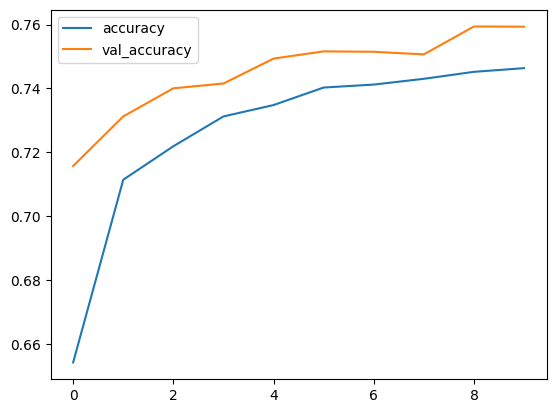

In [80]:
from matplotlib import pyplot as plt
df_plot["accuracy"].plot()
df_plot["val_accuracy"].plot()
plt.legend()

In [ ]:
import pickle
pickle.dump(model,open("modeldl.pkl","wb"))

In [ ]:
tensorflow.__version__

'2.12.0'